In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

import analysis

In [22]:
result_summary = pd.read_csv("summary.csv")
result_summary.tail()

,datetime,run_name,run_config,loss,val_loss,rms_dev,mae,std_diff,output_file,run_time,note
61,2025-05-26 14:14,Dropout:0.6,data/run/2025-05-26 13:51/config_0.6.toml,data/result/2025-05-26 14:14_Dropout:0.6/loss.dat,data/result/2025-05-26 14:14_Dropout:0.6/val_l...,18.133798,2.239549,17.994973,data/result/2025-05-26 14:14_Dropout:0.6/resul...,0:10:30.877675,0.6
62,2025-05-27 13:18,Dropout,data/run/dropout.toml,data/result/2025-05-27 13:18_Dropout/loss.dat,data/result/2025-05-27 13:18_Dropout/val_loss.dat,11.271240,1.823047,11.122830,data/result/2025-05-27 13:18_Dropout/result.csv,0:00:37.914492,NaN
63,2025-05-27 13:19,Dropout,data/run/dropout.toml,data/result/2025-05-27 13:19_Dropout/loss.dat,data/result/2025-05-27 13:19_Dropout/val_loss.dat,22.737980,12.186897,19.196231,data/result/2025-05-27 13:19_Dropout/result.csv,0:36:38.995720,NaN
64,2025-05-27 16:21,Quick Test,data/run/qtest.toml,data/result/2025-05-27 16:21_Quick Test/loss.dat,data/result/2025-05-27 16:21_Quick Test/val_lo...,10.988304,0.433942,10.979733,data/result/2025-05-27 16:21_Quick Test/result...,0:00:19.299211,NaN
65,2025-05-27 16:35,Quick Test,data/run/qtest.toml,data/result/2025-05-27 16:35_Quick Test/loss.dat,data/result/2025-05-27 16:35_Quick Test/val_lo...,10.688113,1.014395,10.639867,data/result/2025-05-27 16:35_Quick Test/result...,0:00:19.265972,NaN


Text(0.5, 0, '% Training Data')

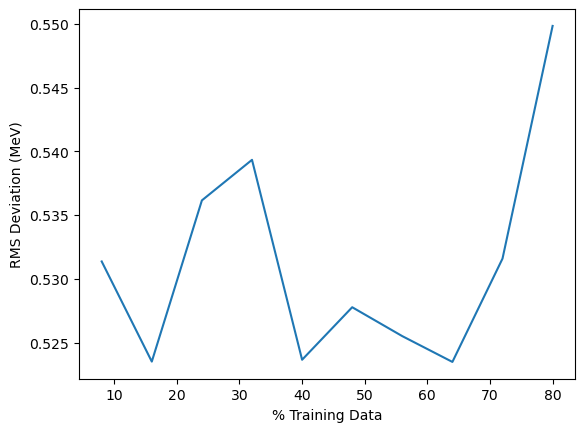

In [21]:
analysed_df = result_summary.loc[15:24].sort_values(by="note")
analysed_df["note"] = analysed_df["note"].astype(float)

plt.plot(analysed_df["note"] * 80, analysed_df["rms_dev"])
plt.ylabel("RMS Deviation (MeV)")
plt.xlabel("% Training Data")

In [17]:
mass_table = result_summary.loc[47, "output_file"]
df = pd.read_csv(mass_table)
df

,param_1,param_2,param_3,param_4,param_5,param_6,param_7,param_8,param_9,param_10,target,prediction,difference
0,0.113119,-0.024557,-1.006402,0.947671,0.143945,-0.186620,0.146755,-0.331671,-0.893260,0.448549,17.418210,17.406784,0.011426
1,0.366150,0.660113,-1.006402,0.947671,0.510114,0.657382,-0.189761,-0.524731,-0.376146,-0.511560,32.113850,31.914099,0.199751
2,0.311929,1.154597,0.993639,-1.055219,0.620969,1.410890,-0.710408,-0.576956,-0.486956,1.568675,77.353780,77.228170,0.125608
3,-1.459281,-1.165674,0.993639,0.947671,-1.422749,-1.124286,-1.166529,1.184211,-0.560830,0.128513,-54.062660,-53.874203,-0.188457
4,1.595152,0.850300,-1.006402,-1.055219,1.287059,0.705235,2.381475,-0.843870,2.135555,0.288531,380.383800,380.044160,0.339641
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6420,-2.019562,-2.382866,-1.006402,0.947671,-2.647683,-1.805960,-1.161845,6.070615,-0.893260,-1.471668,1.328922,2.089839,-0.760917
6421,-0.139911,0.393853,-1.006402,-1.055219,0.108636,0.392917,-0.746216,-0.311160,-0.450019,-1.311650,-25.945560,-26.071323,0.125763
6422,1.793962,1.040486,0.993639,0.947671,1.448556,0.940478,2.560542,-0.898677,2.541859,1.088621,419.829700,419.719020,0.110675
6423,0.655327,0.469927,-1.006402,-1.055219,0.631968,0.344465,0.650355,-0.581998,0.214843,-1.311650,108.016200,107.075905,0.940295


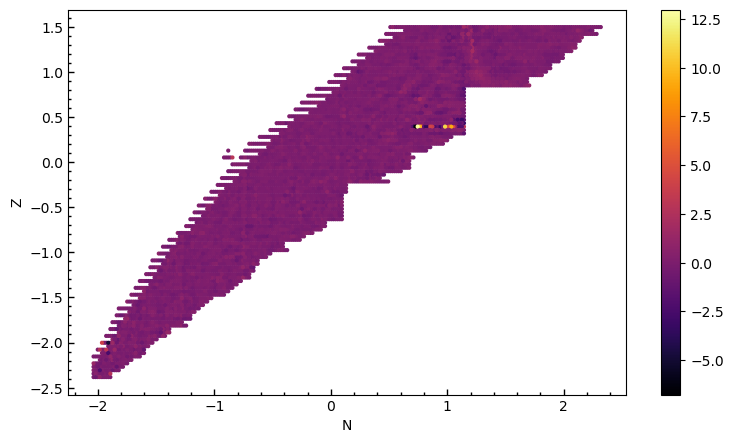

In [18]:
analysis.plot.nuclear_landscape(df["param_1"], df["param_2"], df["difference"])

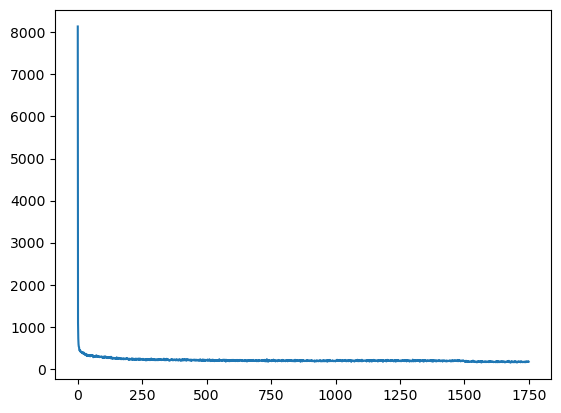

In [ ]:
dddf = result_summary.loc[63]
a = np.loadtxt(dddf["loss"])

In [3]:
np.linspace(0.01, 0.09, 9)

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09])